In [5]:
import numpy as np
import plotly.graph_objects as go
import numpy as np

def generate_kelvin_cell():
    # 定义四边形的顶点坐标
    vertices = np.array([
        # +z方向 (XY平面)
        [1, 0, 2], [0, 1, 2], [-1, 0, 2], [0, -1, 2],
        # +x方向 (YZ平面)
        [2, 1, 0], [2, 0, 1], [2, -1, 0], [2, 0, -1],
        # +y方向 (XZ平面)
        [0, 2, 1], [1, 2, 0], [0, 2, -1], [-1, 2, 0],
        # -z方向 (XY平面)
        [1, 0, -2], [0, 1, -2], [-1, 0, -2], [0, -1, -2],
        # -x方向 (YZ平面)
        [-2, 1, 0], [-2, 0, 1], [-2, -1, 0], [-2, 0, -1],
        # -y方向 (XZ平面)
        [0, -2, 1], [1, -2, 0], [0, -2, -1], [-1, -2, 0]
    ])

    # 初始化六边形列表
    hex_faces = []

    # 定义每个象限的六边形
    for i, (x_cond, y_cond, z_cond) in enumerate([
        (1, 1, 1),   # 第一象限 (+X, +Y, +Z)
        (-1, 1, 1),  # 第二象限 (-X, +Y, +Z)
        (-1, -1, 1), # 第三象限 (-X, -Y, +Z)
        (1, -1, 1),  # 第四象限 (+X, -Y, +Z)
        (1, 1, -1),  # 第五象限 (+X, +Y, -Z)
        (-1, 1, -1), # 第六象限 (-X, +Y, -Z)
        (-1, -1, -1),# 第七象限 (-X, -Y, -Z)
        (1, -1, -1)  # 第八象限 (+X, -Y, -Z)
    ]):
        hexagon = []
        for idx, v in enumerate(vertices):
            x, y, z = v
            if (x == 2*x_cond) or \
               (y == 2*y_cond) or \
               (z == 2*z_cond):
                if np.sum(v*[x_cond,y_cond,z_cond])==3:
                  hexagon.append(idx)

        # 排序逻辑：对每个六边形进行顺时针排序
        x, y, z = vertices[hexagon].T

        # 计算每个点的相对于中心点的角度
        angles = np.arctan2(y - y_cond, x - x_cond)

        # 根据角度对顶点进行排序
        sorted_indices = np.argsort(angles)

        # 根据排序后的顺序调整顶点
        hexagon = [hexagon[idx] for idx in sorted_indices]

        hex_faces.append(hexagon)
        print(f"六边形 {i + 1}（排序后）: {hexagon}")

    return vertices*0.25e-6, hex_faces

def plot_kelvin_cell(fig,vertices, hex_faces):
    # 定义每个象限的顶点顺序（顺时针）
    for hexagon in hex_faces:
        # 获取六边形的顶点坐标
        x, y, z = vertices[hexagon].T

        # 闭合线条：将第一个点重复，以闭合六边形
        x = np.append(x, x[0])
        y = np.append(y, y[0])
        z = np.append(z, z[0])
        # 绘制六边形的顶点

        # 绘制六边形
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            line=dict(color='gray', width=4),
            showlegend=False
        ))
        # 绘制六边形的中心点
        #fig.add_trace(go.Scatter3d(
        #    x=[center_x], y=[center_y], z=[center_z],
        #    mode='markers',
        #    marker=dict(size=8, color='red'),
        #    showlegend=False
        #))
    # 绘制四边形
    for i in range(6):  # 总共有6个四边形
        indices = range(i * 4, i * 4 + 4)  # 每个四边形对应的四个顶点的索引
        x, y, z = vertices[indices].T  # 提取顶点坐标
            # 闭合线条：将第一个点重复，以闭合
        x = np.append(x, x[0])
        y = np.append(y, y[0])
        z = np.append(z, z[0])
        fig.add_trace(go.Scatter3d(
                x=x, y=y, z=z,
                mode='lines',
                line=dict(color='gray', width=4),
                showlegend=False
        ))

    # 绘制顶点
    fig.add_trace(go.Scatter3d(
        x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
        mode='markers',
        marker=dict(size=4, color='black')
    ))
        # 设置坐标轴
    fig.update_layout(scene=dict(
        xaxis=dict(nticks=4, showbackground=True, backgroundcolor="lightgrey"),
        yaxis=dict(nticks=4,  showbackground=True, backgroundcolor="lightgrey"),
        zaxis=dict(nticks=4,  showbackground=True, backgroundcolor="lightgrey"),
    ),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

    return fig

# 生成Kelvin Cell
vertices, hex_faces = generate_kelvin_cell()

fig = go.Figure()
# 可视化Kelvin Cell
fig = plot_kelvin_cell(fig, vertices, hex_faces)

fig.show()

# the generated KC shall be pacekd as a object, with the function of deformation and stiffness
# the generation part has no issues, with all the process outside will be useful to maintain and modify
# Based on that, a good way is to defince the object by pure vertices and connections.
# -> two .xml file, one include the coordinate of all the points and their number, the number should be set based on the origional KC's point rank,
# -> and another .xml, include the connectivity of the points, every KC has 4*6 beam form rect, and 12 (4+4+4) beam to connect them,
# so totally 36 beams connectivity should been drawn to saved in the connectivity .xml file. which should contain the points number for connection.
# that .xml file should beeen made from the vertices and hex_faces parameter. in the hex_face paraemter, it contain the information in a sequence,
# that the points were connected one by one, but you should break it down to make 36 points connect information.



六边形 1（排序后）: [0, 5, 4, 9, 8, 1]
六边形 2（排序后）: [17, 2, 1, 8, 11, 16]
六边形 3（排序后）: [23, 20, 3, 2, 17, 18]
六边形 4（排序后）: [20, 21, 6, 5, 0, 3]
六边形 5（排序后）: [12, 7, 4, 9, 10, 13]
六边形 6（排序后）: [19, 14, 13, 10, 11, 16]
六边形 7（排序后）: [23, 22, 15, 14, 19, 18]
六边形 8（排序后）: [22, 21, 6, 7, 12, 15]


In [2]:
import xml.etree.ElementTree as ET

class KelvinCell:
    def __init__(self, vertices, hex_faces):
        self.vertices = vertices
        self.hex_faces = hex_faces
        self.connectivity = self._generate_connectivity()

    def _generate_connectivity(self):
        connectivity = []
        for hexagon in self.hex_faces:
            for i in range(len(hexagon)):
                start_point = hexagon[i]
                end_point = hexagon[(i + 1) % len(hexagon)]
                connectivity.append((start_point, end_point))
        return connectivity

    def deform(self, deformation_matrix):
        # Apply deformation to vertices
        self.vertices = np.dot(self.vertices, deformation_matrix)

    def calculate_stiffness(self):
        # Placeholder: Implement stiffness calculation
        pass

    def to_xml(self, vertices_file, connectivity_file):
        # Export vertices to XML
        vertices_root = ET.Element("Vertices")
        for i, vertex in enumerate(self.vertices):
            ET.SubElement(vertices_root, "Vertex", id=str(i + 1),
                          x=str(vertex[0]), y=str(vertex[1]), z=str(vertex[2]))
        vertices_tree = ET.ElementTree(vertices_root)
        vertices_tree.write(vertices_file)

        # Export connectivity to XML
        connectivity_root = ET.Element("Connectivity")
        for i, (start, end) in enumerate(self.connectivity):
            ET.SubElement(connectivity_root, "Beam", point1=str(start + 1), point2=str(end + 1))
        connectivity_tree = ET.ElementTree(connectivity_root)
        connectivity_tree.write(connectivity_file)

    def visualize(self):
        fig = go.Figure()

        # Draw the beams (connectivity)
        for start, end in self.connectivity:
            x = [self.vertices[start][0], self.vertices[end][0]]
            y = [self.vertices[start][1], self.vertices[end][1]]
            z = [self.vertices[start][2], self.vertices[end][2]]

            fig.add_trace(go.Scatter3d(
                x=x, y=y, z=z,
                mode='lines',
                line=dict(color='blue', width=4),
                showlegend=False
            ))

        # Draw the vertices
        fig.add_trace(go.Scatter3d(
            x=self.vertices[:, 0], y=self.vertices[:, 1], z=self.vertices[:, 2],
            mode='markers',
            marker=dict(size=6, color='red')
        ))

        # Set the layout for better visualization
        fig.update_layout(scene=dict(
            xaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            yaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            zaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
        ),
        width=700,
        margin=dict(r=20, l=10, b=10, t=10))

        fig.show()


# Example usage
kc = KelvinCell(vertices, hex_faces)
kc.to_xml("origional_vertices.xml", "origional_connectivity.xml")

kc.visualize()

In [3]:
import numpy as np
import json
import vtk
from vtk.util.numpy_support import numpy_to_vtk, numpy_to_vtkIdTypeArray


class Deformation:
    def apply(self, vertices):
        raise NotImplementedError("The deformation method must be implemented by subclasses")

class RotateDeformation(Deformation):
    def __init__(self, axis, direction=1, degree=90):
        self.axis = axis.lower()
        self.direction = direction
        self.degree = np.deg2rad(degree)  # Convert to radians

        if self.axis not in ['x', 'y', 'z']:
            raise ValueError("Axis must be 'x', 'y', or 'z'")

        self.rotation_matrix = self._create_rotation_matrix()

    def _create_rotation_matrix(self):
        cos_theta = np.cos(self.degree)
        sin_theta = np.sin(self.degree) * self.direction

        if self.axis == 'x':
            return np.array([
                [1, 0, 0],
                [0, cos_theta, -sin_theta],
                [0, sin_theta, cos_theta]
            ])
        elif self.axis == 'y':
            return np.array([
                [cos_theta, 0, sin_theta],
                [0, 1, 0],
                [-sin_theta, 0, cos_theta]
            ])
        elif self.axis == 'z':
            return np.array([
                [cos_theta, -sin_theta, 0],
                [sin_theta, cos_theta, 0],
                [0, 0, 1]
            ])

    def apply(self, vertices, indices_to_deform):
        vertices[indices_to_deform] = np.dot(vertices[indices_to_deform], self.rotation_matrix)
        return vertices

class ExtendDeformation(Deformation):
    def __init__(self, axis, distance=1):
        self.axis = axis.lower()
        self.distance = distance

        if self.axis not in ['x', 'y', 'z']:
            raise ValueError("Axis must be 'x', 'y', or 'z'")

    def apply(self, vertices, indices_to_deform):
        axis_index = {'x': 0, 'y': 1, 'z': 2}[self.axis]
        vertices[indices_to_deform, axis_index] += self.distance
        return vertices

class ShiftDeformation(Deformation):
    def __init__(self, axis, direction, distance=0.5):
        self.axis = axis.lower()
        self.direction = np.deg2rad(direction)  # Convert direction angle to radians
        self.distance = distance

        if self.axis not in ['x', 'y', 'z']:
            raise ValueError("Axis must be 'x', 'y', or 'z'")

    def apply(self, vertices, indices_to_deform):
        # axis_index is the index of the axis that we want to shift along (e.g., 0 for x, 1 for y, 2 for z)
        axis_index = {'x': 0, 'y': 1, 'z': 2}[self.axis]

        # Calculate the shift components along the two axes orthogonal to the specified axis
        shift_vector = np.zeros(vertices.shape[1])
        orthogonal_axis_1 = (axis_index + 1) % 3
        orthogonal_axis_2 = (axis_index + 2) % 3

        # Apply trigonometric functions to determine the components of the shift
        shift_vector[orthogonal_axis_1] = np.cos(self.direction) * self.distance
        shift_vector[orthogonal_axis_2] = np.sin(self.direction) * self.distance

        # Apply the shift to the vertices
        vertices[indices_to_deform] += shift_vector

        return vertices

class DeformManager:
    def __init__(self, vertices):
        self.vertices = vertices

    def _get_direction_from_code(self, axis_code):
        # Convert axis_code back to direction string
        direction_map = {
            1: "+x", -1: "-x",
            2: "+y", -2: "-y",
            3: "+z", -3: "-z"
        }
        return direction_map[axis_code]


    def _get_indices_for_direction(self, direction):
        # Mapping from direction to indices
        direction_map = {
            "+x": [4, 5, 6, 7],
            "-x": [16, 17, 18, 19],
            "+y": [8, 9, 10, 11],
            "-y": [20, 21, 22, 23],
            "+z": [0, 1, 2, 3],
            "-z": [12, 13, 14, 15],
        }
        return direction_map[direction]

    def matrix(self, deformation_matrix):
        for deformation in deformation_matrix:
            operation = int(deformation[0])
            axis_code = int(deformation[1])
            distance = deformation[2]
            degree = deformation[3]

            # Decode axis_code back to direction string (e.g., "+x")
            direction = self._get_direction_from_code(axis_code)

            # Get indices for this direction
            indices_to_deform = self._get_indices_for_direction(direction)

            if operation == 0:  # Rotate
                self.rotate(direction, degree)
            elif operation == 1:  # Extend
                self.extend(direction, distance)
            elif operation == 2:  # Shift
                self.shift(direction, degree, distance)

        return self.vertices



    def rotate(self, direction, degree=90):
        axis = direction[1]  # 'x', 'y', or 'z'
        sign = 1 if direction[0] == '+' else -1  # Determine direction of rotation

        rotation = RotateDeformation(axis, direction=sign, degree=degree)
        indices_to_deform = self._get_indices_for_direction(direction)
        self.vertices = rotation.apply(self.vertices.copy(), indices_to_deform)  # Apply on a copy to maintain continuous deformation
        return self.vertices

    def extend(self, direction, distance=1):
        axis = direction[1]  # 'x', 'y', or 'z'
        sign = 1 if direction[0] == '+' else -1  # Determine direction of extension

        extend = ExtendDeformation(axis, distance * sign)
        indices_to_deform = self._get_indices_for_direction(direction)
        self.vertices = extend.apply(self.vertices.copy(), indices_to_deform)
        return self.vertices

    def shift(self, direction, degree, distance=0.5):
        axis = direction[1]  # 'x', 'y', or 'z'

        shift = ShiftDeformation(axis, degree, distance)
        indices_to_deform = self._get_indices_for_direction(direction)
        self.vertices = shift.apply(self.vertices.copy(), indices_to_deform)
        return self.vertices

class KelvinCell:
    def __init__(self, vertices, hex_faces):
        self.original_vertices = vertices.astype(np.float64).copy()  # Keep the original vertices
        self.vertices = vertices.astype(np.float64)  # Ensure vertices are of float type
        self.hex_faces = hex_faces
        self.connectivity = self._generate_connectivity()
        self.deform = DeformManager(self.vertices)  # 初始化DeformManager
        self.center = [0,0,0]
        self.beam_radius = 0.03

    def _generate_connectivity(self):
        connectivity = []
        for hexagon in self.hex_faces:
            for i in range(len(hexagon)):
                start_point = hexagon[i]
                end_point = hexagon[(i + 1) % len(hexagon)]
                connectivity.append((start_point, end_point))
        return connectivity

    def calculate_stiffness(self):
        # Placeholder: Implement stiffness calculation
        pass

    def to_xml(self, vertices_file, connectivity_file):
        # Export vertices to XML
        pass

    def generate_mesh(self, file_name="kc_beam_mesh.vtk"):
        points = vtk.vtkPoints()
        cells = vtk.vtkCellArray()

        # Add points to the VTK Points object
        for i, vertex in enumerate(self.vertices):
            points.InsertNextPoint(vertex[0], vertex[1], vertex[2])

        # Create and add lines to the VTK CellArray
        for start, end in self.connectivity:
            line = vtk.vtkLine()
            line.GetPointIds().SetId(0, start)
            line.GetPointIds().SetId(1, end)
            cells.InsertNextCell(line)

        # Create an unstructured grid
        unstructured_grid = vtk.vtkUnstructuredGrid()
        unstructured_grid.SetPoints(points)
        unstructured_grid.SetCells(vtk.VTK_LINE, cells)

        # Write the grid to a file
        writer = vtk.vtkUnstructuredGridWriter()
        writer.SetFileName(file_name)
        writer.SetInputData(unstructured_grid)
        writer.Write()

        print(f"Mesh saved to {file_name}")

    def show_mesh(self):
        fig = go.Figure()

        for start, end in self.connectivity:
            start_coords = self.vertices[start]
            end_coords = self.vertices[end]

            x = [start_coords[0], end_coords[0]]
            y = [start_coords[1], end_coords[1]]
            z = [start_coords[2], end_coords[2]]

            fig.add_trace(go.Scatter3d(
                x=x, y=y, z=z,
                mode='lines',
                line=dict(width=self.beam_radius*10, color='green')
            ))

        fig.update_layout(scene=dict(
            xaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            yaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            zaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
        ),
        width=700,
        margin=dict(r=20, l=10, b=10, t=10))

        fig.show()

    def visualize(self):
        fig = go.Figure()

        # Draw the beams (connectivity)
        for start, end in self.connectivity:
            x = [self.vertices[start][0], self.vertices[end][0]]
            y = [self.vertices[start][1], self.vertices[end][1]]
            z = [self.vertices[start][2], self.vertices[end][2]]

            fig.add_trace(go.Scatter3d(
                x=x, y=y, z=z,
                mode='lines',
                line=dict(color='blue', width=20),
                showlegend=False
            ))

        # Draw the vertices
        fig.add_trace(go.Scatter3d(
            x=self.vertices[:, 0], y=self.vertices[:, 1], z=self.vertices[:, 2],
            mode='markers',
            marker=dict(size=4, color='red')
        ))

        # Set the layout for better visualization
        fig.update_layout(scene=dict(
            xaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            yaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
            zaxis=dict(nticks=4, range=[-3, 3], showbackground=True, backgroundcolor="lightgrey"),
        ),
        width=700,
        margin=dict(r=20, l=10, b=10, t=10))

        fig.show()

kc = KelvinCell(vertices, hex_faces)

# Rotate the quadrilateral in the +x direction around the x-axis by 90 degrees
kc.deform.rotate("+x", degree=90)

kc.deform.extend("+x", distance =0.2)

kc.deform.rotate("-x", degree = 45)

kc.deform.shift("+y", degree = 30, distance = 1)

kc.vertices = kc.deform.vertices # update the deformed vertices

# Shift the quadrilateral in the +x direction by 0.5 units along a 90 degree direction
kc.visualize()

In [4]:

kc_m = KelvinCell(vertices, hex_faces)

deformation_matrix = np.array([
    [0, 1, 0, 90],  # Rotate +x by 90 degrees
    [1, 1, 0.2, 0],  # Extend +x by 0.2 units
    [0, -1, 0, 45],  # Rotate -x by 45 degrees
    [2, 2, 1, 30]  # Shift +y by 1 unit along 30 degrees
])

kc_m.deform.matrix(deformation_matrix)

kc_m.vertices = kc_m.deform.vertices

kc_m.visualize()

# this matrix, imposed a very important idea, that if we want the connectivity of two KC
# then we must full fill one requrirement, which is
# after connect two KC togther, we shall add their deformation matrix, is the first element of the
# row is zero (means we are looking at the connected rectangular), then the rest of the elements in the row must be zero
# this means the miror KC

In [5]:
# a perodictly repeating matrix of the KC shall be like

rep_matrix = [5, 8, 3] # repeating in x for 5 time, in y for 8 times, and in z for 3 times

# then the center matrix shall be like:
# center = [0,0,0], [2,0,0], [4,0.0]...... in total 120 centers. shall be inside
# give me a code to calculate this

def calculate_centers(rep_matrix):
    x_repeat, y_repeat, z_repeat = rep_matrix
    centers = []

    for i in range(x_repeat):
        for j in range(y_repeat):
            for k in range(z_repeat):
                centers.append([4 * i, 4 * j, 4 * k])

    return np.array(centers)

# Example usage
rep_matrix = [5, 8, 3]
centers = calculate_centers(rep_matrix)

print("Centers of Kelvin Cells:")
print(centers)


Centers of Kelvin Cells:
[[ 0  0  0]
 [ 0  0  4]
 [ 0  0  8]
 [ 0  4  0]
 [ 0  4  4]
 [ 0  4  8]
 [ 0  8  0]
 [ 0  8  4]
 [ 0  8  8]
 [ 0 12  0]
 [ 0 12  4]
 [ 0 12  8]
 [ 0 16  0]
 [ 0 16  4]
 [ 0 16  8]
 [ 0 20  0]
 [ 0 20  4]
 [ 0 20  8]
 [ 0 24  0]
 [ 0 24  4]
 [ 0 24  8]
 [ 0 28  0]
 [ 0 28  4]
 [ 0 28  8]
 [ 4  0  0]
 [ 4  0  4]
 [ 4  0  8]
 [ 4  4  0]
 [ 4  4  4]
 [ 4  4  8]
 [ 4  8  0]
 [ 4  8  4]
 [ 4  8  8]
 [ 4 12  0]
 [ 4 12  4]
 [ 4 12  8]
 [ 4 16  0]
 [ 4 16  4]
 [ 4 16  8]
 [ 4 20  0]
 [ 4 20  4]
 [ 4 20  8]
 [ 4 24  0]
 [ 4 24  4]
 [ 4 24  8]
 [ 4 28  0]
 [ 4 28  4]
 [ 4 28  8]
 [ 8  0  0]
 [ 8  0  4]
 [ 8  0  8]
 [ 8  4  0]
 [ 8  4  4]
 [ 8  4  8]
 [ 8  8  0]
 [ 8  8  4]
 [ 8  8  8]
 [ 8 12  0]
 [ 8 12  4]
 [ 8 12  8]
 [ 8 16  0]
 [ 8 16  4]
 [ 8 16  8]
 [ 8 20  0]
 [ 8 20  4]
 [ 8 20  8]
 [ 8 24  0]
 [ 8 24  4]
 [ 8 24  8]
 [ 8 28  0]
 [ 8 28  4]
 [ 8 28  8]
 [12  0  0]
 [12  0  4]
 [12  0  8]
 [12  4  0]
 [12  4  4]
 [12  4  8]
 [12  8  0]
 [12  8  4]
 [12  8  8]
 [1

In [6]:
# from all these centers, we can then have cooresponding deformation matrix D1, D2... D120
# the deformation matrix shall be coorelated with centers matrix, C1, C2.... C120
# if the |Ci-Cj| = 4 then they connect. the contact at KC_j surface is Ci-Cj/4. for instance the contact surface of KC2 which centered at
# [0,0,4] with KC0 which centered at [0,0,0] shall be [0,0,-1], representingt the -z axis of KC2
# and hence, the KC2's deformation matrix must full fill the rule of this:

kc_2 = KelvinCell(vertices, hex_faces)

deformation_matrix = np.array([
    [0, 1, 0, 90],  # Rotate +x by 90 degrees
    [1, 1, 0.2, 0],  # Extend +x by 0.2 units
    [0, -1, 0, 45],  # Rotate -x by 45 degrees
    [2, 2, 1, 30]  # Shift +y by 1 unit along 30 degrees
])

kc_2.deform.matrix(deformation_matrix)

kc_2.vertices = kc_m.deform.vertices

# this matrix, imposed a very important idea, that if we want the connectivity of two KC
# then we must full fill one requrirement, which is
# after connect two KC togther, we shall add their deformation matrix, is the first element of the
# row is zero (means we are looking at the connected rectangular), then the rest of the elements in the row must be zero

# from all those information, we can then constructed a loss funciton and constrains of geometry continuity

# the loss function can be minize deformation under certain force




 _____                  ______      
|_   _|                 | ___ \     
  | |_ __ _   _ ___ ___ | |_/ /   _ 
  | | '__| | | / __/ __||  __/ | | |
  | | |  | |_| \__ \__ \| |  | |_| |
  \_/_|   \__,_|___/___/\_|   \__, |
                               __/ |
                              |___/ 

TrussPy - Truss Solver for Python
          Version 3.0.1

Dutzler Andreas, Graz University of Technology, 2023
        

# Model Summary
Analysis Dimension      "ndim": 3
Number of Nodes       "nnodes": 24
Number of Elements    "nelems": 48
 
System DOF              "ndof": 72
active DOF             "ndof1": 12
locked DOF             "ndof2": 40
 
active DOF          "nproDOF1": [ 9 10 11 12 13 14 15 16 17 18 19 20]
fixed  DOF          "nproDOF0": [ 0  2  3  5  6  8 21 23 24 26 27 29 30 32 33 35 36 38 39 41 42 44 45 47
 48 50 51 53 54 56 57 59 60 62 63 65 66 68 69 71]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:---

(<Figure size 800x600 with 2 Axes>,
 <Axes3D: title={'center': 'INCREMENT: 50, CONTOUR = force'}, xlabel='x', ylabel='y', zlabel='z'>)

<Figure size 640x480 with 0 Axes>

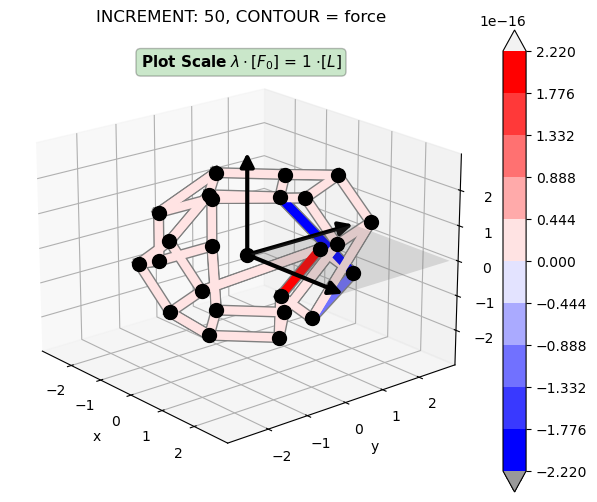

In [7]:
import trusspy as tp

# Initialize the model
M = tp.Model()

# Step 1: Create nodes
with M.Nodes as MN:
    for i, coord in enumerate(kc_2.vertices):
        MN.add_node(i + 1, coord)  # Node numbering starts from 1

# Step 2: Create elements based on the connectivity
with M.Elements as ME:
    for i, (start, end) in enumerate(kc_2.connectivity):
        ME.add_element(i + 1, [start + 1, end + 1])  # Adjust to match 1-based indexing in trusspy
    ME.assign_material("all", [1])  # Assuming a single material for simplicity
    ME.assign_geometry("all", [1])  # Assuming a single geometry for simplicity

# Assuming you have a list of all node IDs and a set of forced nodes
all_nodes = set(range(1, 25))  # Example: nodes numbered 1 to 24
forced_nodes = set(range(4,8))  # The node you already constrained

# Calculate edge nodes (not including the forced node)
edge_nodes = all_nodes - forced_nodes

with M.Boundaries as MB:
    # Apply boundary conditions to all edge nodes
    for node in edge_nodes:
        MB.add_bound_U(node, (0, None, 0))  # Example: fixing z-direction

with M.ExtForces as MF:
    for force in forced_nodes:
      MF.add_force(force, (0, 0, 1000))  # Apply a force to node 8 as an example

# Build and run the model
M.build()
M.run()

# Visualize the results
M.plot_model(inc=-1, contour="force", view = "3d")

In [8]:
# try to generate a mesh based on the nodes and connect. Since we have the structure, then we can make unified mesh.
# generate them, and then connect with COMSOL, and then update the mesh geometry of the comsol model

kc.generate_mesh()
kc.show_mesh()

Mesh saved to kc_beam_mesh.vtk


In [9]:
kc.connectivity


[(0, 5),
 (5, 4),
 (4, 9),
 (9, 8),
 (8, 1),
 (1, 0),
 (17, 2),
 (2, 1),
 (1, 8),
 (8, 11),
 (11, 16),
 (16, 17),
 (23, 20),
 (20, 3),
 (3, 2),
 (2, 17),
 (17, 18),
 (18, 23),
 (20, 21),
 (21, 6),
 (6, 5),
 (5, 0),
 (0, 3),
 (3, 20),
 (12, 7),
 (7, 4),
 (4, 9),
 (9, 10),
 (10, 13),
 (13, 12),
 (19, 14),
 (14, 13),
 (13, 10),
 (10, 11),
 (11, 16),
 (16, 19),
 (23, 22),
 (22, 15),
 (15, 14),
 (14, 19),
 (19, 18),
 (18, 23),
 (22, 21),
 (21, 6),
 (6, 7),
 (7, 12),
 (12, 15),
 (15, 22)]

In [10]:
for i in range(4,8):
  print(i)

4
5
6
7


In [11]:
pip install sfepy

  Using cached sfepy-2024.2.tar.gz (21.8 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 2
  ╰─> [88 lines of output]
      Ignoring numpy: markers 'python_version <= "3.9"' don't match your environment
        Using cached scikit_build-0.18.0-py3-none-any.whl (85 kB)
        Using cached cmake-3.30.2-py3-none-win_amd64.whl (35.6 MB)
        Using cached ninja-1.11.1.1-py2.py3-none-win_amd64.whl (312 kB)
           --                                       0.2/2.3 MB 18.5 kB/s eta 0:01:57
      ERROR: Exception:
      Traceback (most recent call last):
        File "C:\Users\lieng\.conda\envs\my_new_env\envs\jpylab-env\Lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
          yield
        File "C:\Users\lieng\.conda\envs\my_new_env\envs\jpylab-env\Lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
          data = self._fp_read(amt) if not fp_closed else b""
        File "C:\Users\lieng\.conda\

In [12]:
import pyvista as pv
import meshio

# Read the POLYDATA VTK file using pyvista
mesh = pv.read('kc_beam_mesh.vtk')

# Convert the mesh to an unstructured grid
unstructured_mesh = mesh.extract_surface().triangulate()
unstructured_mesh.save('kc_beam_mesh_unstructured.vtk')

# Alternatively, use meshio to convert it
meshio.write('kc_beam_mesh_unstructured.vtk', meshio.read('kc_beam_mesh.vtk'))

In [13]:
pip install git+https://www.github.com/knutankv/beef.git@master

  Cloning https://www.github.com/knutankv/beef.git (to revision master) to c:\users\lieng\appdata\local\temp\pip-req-build-8h9u4bgh
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://www.github.com/knutankv/beef.git 'C:\Users\lieng\AppData\Local\Temp\pip-req-build-8h9u4bgh'
  fatal: unable to access 'https://www.github.com/knutankv/beef.git/': OpenSSL SSL_read: SSL_ERROR_SYSCALL, errno 0
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://www.github.com/knutankv/beef.git 'C:\Users\lieng\AppData\Local\Temp\pip-req-build-8h9u4bgh' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://www.github.com/knutankv/beef.git 'C:\Users\lieng\AppData\Local\Temp\pip-req-build-8h9u4bgh' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [14]:
pip install trame ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [15]:

kc = KelvinCell(vertices, hex_faces)

deformation_matrix = np.array([
    [0, 1, 0, 90],  # Rotate +x by 90 degrees
])
kc.deform.matrix(deformation_matrix)

kc.vertices = kc.deform.vertices

kc.visualize()

In [16]:
import numpy as np
from beef import fe
from beef.modal import normalize_phi
import pyvista as pv

# Define the section properties for the Kelvin Cell
kc_section_params = dict(
    A=0.05,          # Cross-sectional area (m^2)
    m=1e3,           # Mass per unit length (kg/m)
    I_z=1e-8,        # Second moment of area about z-axis (m^4)
    I_y=1e-8,        # Second moment of area about y-axis (m^4)
    E=20e9,          # Young's modulus (Pa)
    J=1e-8,          # Torsional constant (m^4)
    poisson=0.3      # Poisson's ratio
)
kc_section = fe.Section(**kc_section_params, name='Kelvin Cell section')

# Use kc.vertices as the node matrix
node_labels = np.arange(1, kc.vertices.shape[0] + 1).astype(int)
node_matrix = np.hstack((node_labels.reshape(-1, 1), kc.vertices))

# Use kc.connectivity as the element matrix, converting to 1-based indexing
element_labels = np.arange(1, len(kc.connectivity) + 1).astype(int)
element_matrix = np.hstack((element_labels.reshape(-1, 1), np.array(kc.connectivity) + 1))

# Define the part using the node and element matrices
part = fe.Part(node_matrix, element_matrix, [kc_section] * element_matrix.shape[0])

# Define constraints (fixing the first plane)
constraints = [fe.Constraint([16, 17, 18, 19, 20], dofs='all', node_type='beam3d')]

# Define assembly
assembly = fe.Assembly([part], constraints=constraints)
assembly.plot(node_labels=True, element_labels=False)

# Perform eigenvalue analysis
analysis = fe.Analysis(assembly)
lambd, phi = analysis.run_eig()
phi = normalize_phi(phi)


mode_ix = 110
scaling = 1
analysis.eldef.deform(phi[:, mode_ix] * scaling)
print(f'Mode {mode_ix+1}, f = {np.abs(np.imag(lambd[mode_ix])/2/np.pi):.4f} Hz')
sc = analysis.eldef.plot(plot_states=['undeformed', 'deformed'])


Widget(value='<iframe src="http://localhost:4737/index.html?ui=P_0x1df867ead10_0&reconnect=auto" class="pyvist…

Mode 111, f = 223.7032 Hz


Widget(value='<iframe src="http://localhost:4737/index.html?ui=P_0x1df8862f940_1&reconnect=auto" class="pyvist…

In [17]:
mode_ix = 120
scaling = 1
analysis.eldef.deform(phi[:, mode_ix] * scaling)
print(f'Mode {mode_ix+1}, f = {np.abs(np.imag(lambd[mode_ix])/2/np.pi):.4f} Hz')
sc = analysis.eldef.plot(plot_states=['undeformed', 'deformed'])


IndexError: index 120 is out of bounds for axis 1 with size 114

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.abs(np.imag(lambd[82:])/2/np.pi), 'o-')
plt.xlabel('Mode Index')
plt.ylabel('Frequency (Hz)')

In [ ]:
import numpy as np
from beef import fe
import pyvista as pv

# Set up the backend for plotting
pv.set_jupyter_backend('trame')

# Define the section properties for the Kelvin Cell
kc_section_params = dict(A=100, m=5000, I_z=1e-2, I_y=1e-2, E=210e9, J=1e-2, poisson=0.3)
kc_section = fe.Section(**kc_section_params, name='Kelvin Cell section')

# Use kc.vertices as the node matrix
node_labels = np.arange(1, kc.vertices.shape[0] + 1).astype(int)
node_matrix = np.hstack((node_labels.reshape(-1, 1), kc.vertices))

# Use kc.connectivity as the element matrix, converting to 1-based indexing
element_labels = np.arange(1, len(kc.connectivity) + 1).astype(int)
element_matrix = np.hstack((element_labels.reshape(-1, 1), np.array(kc.connectivity) + 1))

# Define the part using the node and element matrices
part = fe.Part(node_matrix, element_matrix, [kc_section] * element_matrix.shape[0])

# Define constraints (e.g., fixing the first node)
constraints = [fe.Constraint([1], dofs='all', node_type='beam3d')]

# Define assembly
assembly = fe.Assembly([part], constraints=constraints)

# Define the strain tensors for x, y, and z directions
strain_tensors = [
    np.array([[1, 0, 0], [0, 0, 0], [0, 0, 0]]),  # Strain in x direction
    np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),  # Strain in y direction
    np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1]])   # Strain in z direction
]

# Initialize an empty tensor for Hooke's tensor
hookes_tensor = np.zeros((3, 3, 3, 3))

# Perform simulation for each strain direction
for i, strain_tensor in enumerate(strain_tensors):
    # Convert strain to displacement for nodes
    displacements = strain_tensor @ node_matrix[:, 1:].T

    # Define displacements as boundary conditions
    displacements_applied = [fe.Displacement(node_labels, 'all', displacements.T)]

    # Create a new analysis for the displaced structure
    analysis = fe.Analysis(assembly, displacements=displacements_applied)
    
    # Run a linear static analysis to get the stress response
    analysis.run_lin_static()

    # Extract the stress response
    stress_tensor = analysis.extract_stress_tensor()  # Placeholder for stress extraction

    # Fill in the appropriate components of Hooke's tensor
    hookes_tensor[i] = stress_tensor

# Now `hookes_tensor` contains the components of your material's elasticity tensor
print("Hooke's Tensor:\n", hookes_tensor)


In [ ]:
kc_section_params = dict(
    A=0.05,          # Cross-sectional area (m^2)
    m=1e3,           # Mass per unit length (kg/m)
    I_z=1e-8,        # Second moment of area about z-axis (m^4)
    I_y=1e-8,        # Second moment of area about y-axis (m^4)
    E=20e9,          # Young's modulus (Pa)
    J=1e-8,          # Torsional constant (m^4)
    poisson=0.3      # Poisson's ratio
)
kc_section = fe.Section(**kc_section_params, name='Kelvin Cell section')

# Use kc.vertices as the node matrix
node_labels = np.arange(1, kc.vertices.shape[0] + 1).astype(int)
node_matrix = np.hstack((node_labels.reshape(-1, 1), kc.vertices))

# Use kc.connectivity as the element matrix, converting to 1-based indexing
element_labels = np.arange(1, len(kc.connectivity) + 1).astype(int)
element_matrix = np.hstack((element_labels.reshape(-1, 1), np.array(kc.connectivity) + 1))

# Define the part using the node and element matrices
part = fe.Part(node_matrix, element_matrix, [kc_section] * element_matrix.shape[0])

# Define constraints (fixing the first plane)
constraints = [fe.Constraint([16, 17, 18, 19, 20], dofs='all', node_type='beam3d')]

# Define assembly
assembly = fe.Assembly([part], constraints=constraints)
assembly.plot(node_labels=True, element_labels=False)

# Perform eigenvalue analysis
analysis = fe.Analysis(assembly)
lambd, phi = analysis.run_eig()
phi = normalize_phi(phi)